In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp
from matplotlib_venn import venn3

In [2]:
input_path = '/Volumes/Behaviour/S1 2P Neural Tuning/95th Percentile' 
output_path = '/Volumes/Behaviour/S1 2P Neural Tuning/95th Percentile'
sessions = [session for session in os.listdir(input_path) if session.endswith('.csv')]
stimuli = ['warm', 'hot', 'opto', 'off-target', 'von frey', 'pin-prick', 'approach', 'no stim']

In [3]:
# Quantify fraction of responsive cells by modality
session_names = []
li = []

for session in sessions:
    if session.startswith('._'): # circumventing issues with invisible files on external drives
        continue
    if session.endswith('2P05_Ses01.csv'): # excluding for the time being incomplete sessions (half-sessions)
        continue
    if session.endswith('2P05_Ses02.csv'):
        continue
    if session.endswith('2P07_Ses02.csv'):
        continue
    if session.endswith('2P11_Ses03.csv'):
        continue
    
    entries = session.split('_')
    
    if session.endswith('CFA.csv'): 
        ses_name = entries[2][2:]+'_'+entries[3][:3]
        
    else:
        ses_name = entries[2][2:]+'_'+entries[3][:5]
            
    #print(ses_name)
    session_names.append(ses_name)
    
    tuning = pd.read_csv(os.path.join(input_path, session))
    tuning.set_index('trial', inplace=True)
    nb_cells = tuning.shape[1]
    tuning['sum']= tuning.sum(axis=1)
    tuning['fraction']= tuning['sum']/nb_cells
    
    for s in stimuli:
        byStim = tuning.loc[tuning.index.str.contains(str(s))]
        mean = byStim['sum'].mean()
        fraction = byStim['fraction'].mean()
        stimAve = [s, ses_name, mean, fraction] 
        li.append(stimAve)
        
cols = ['modality', 'session', 'nb_tuned_cells', 'fraction_tuned_cells']
ave_tuning = pd.DataFrame(li, columns=cols)   
ave_tuning.to_csv(os.path.join(output_path, 'average_tuning_95.csv'))

In [5]:
health = ave_tuning.loc[ave_tuning['session'].str.contains('Ses')]
cfa = ave_tuning.loc[ave_tuning['session'].str.contains('CFA')]

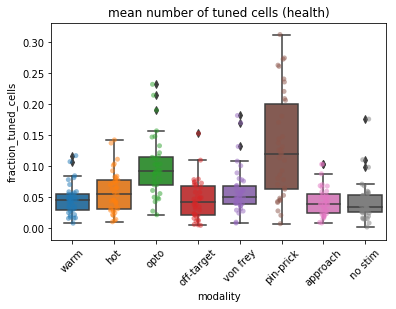

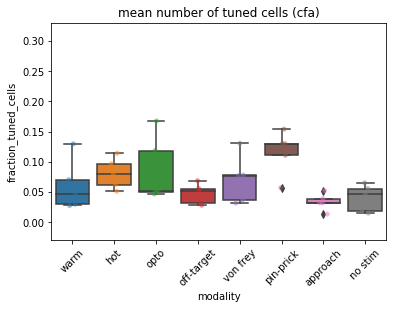

In [6]:
ax = sns.stripplot(x='modality', y='fraction_tuned_cells', alpha=0.5, data=health)
ax = sns.boxplot(x='modality', y='fraction_tuned_cells', data=health)
plt.xticks(rotation=45)
plt.title('mean number of tuned cells (health)')
plt.savefig(os.path.join(output_path, 'health mean nb tuned cells 95.png'), bbox_inches='tight')
plt.show()

ax = sns.stripplot(x='modality', y='fraction_tuned_cells', alpha=0.5, data=cfa)
ax = sns.boxplot(x='modality', y='fraction_tuned_cells', data=cfa)
plt.xticks(rotation=45)
plt.ylim(-0.03,0.33)
plt.title('mean number of tuned cells (cfa)')
plt.savefig(os.path.join(output_path, 'cfa mean nb tuned cells 95.png'), bbox_inches='tight')
plt.show()

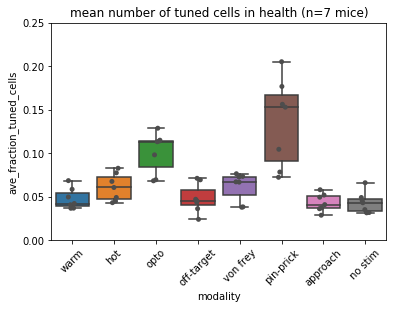

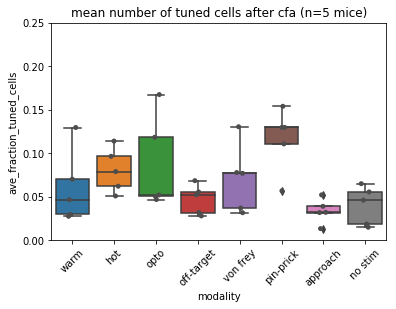

,mouse,modality,ave_fraction_tuned_cells
0,2P07,warm,0.029605
1,2P07,hot,0.096491
2,2P07,opto,0.118421
3,2P07,off-target,0.027961
4,2P07,von frey,0.077851


In [7]:
stats_health = []
cols = ['mouse', 'modality', 'ave_fraction_tuned_cells']
mice = ['2P05', '2P06', '2P07', '2P08', '2P09', '2P10', '2P11']
for m in mice:
    by_mouse = health[health['session'].str.contains(m)]
    for s in stimuli:
        ave = by_mouse[by_mouse['modality']==s]['fraction_tuned_cells'].mean()
        stats = [m, s,ave]
        stats_health.append(stats)
    
stats_health = pd.DataFrame(stats_health, columns = cols)
#stats_health.to_csv(os.path.join(output_path, 'stats by mouse health 95.csv'))
ax = sns.stripplot(x='modality', y='ave_fraction_tuned_cells',color='.3', data=stats_health)
ax = sns.boxplot(x='modality', y='ave_fraction_tuned_cells', data=stats_health)
plt.xticks(rotation=45)
plt.ylim(0, 0.25)
plt.title('mean number of tuned cells in health (n=7 mice)')
plt.savefig(os.path.join(output_path, 'health mean nb tuned cells 95 (mouse ave).png'), bbox_inches='tight')
plt.show()

stats_cfa = []
cols = ['mouse', 'modality', 'ave_fraction_tuned_cells']
mice = ['2P07', '2P08', '2P09', '2P10', '2P11']
for m in mice:
    by_mouse = cfa[cfa['session'].str.contains(m)]
    for s in stimuli:
        ave = by_mouse[by_mouse['modality']==s]['fraction_tuned_cells'].mean()
        stats = [m, s,ave]
        stats_cfa.append(stats)
    
stats_cfa = pd.DataFrame(stats_cfa, columns = cols)
stats_cfa.to_csv(os.path.join(output_path, 'stats by mouse cfa 95.csv'))
ax = sns.stripplot(x='modality', y='ave_fraction_tuned_cells',color='.3', data=stats_cfa)
ax = sns.boxplot(x='modality', y='ave_fraction_tuned_cells', data=stats_cfa)
plt.xticks(rotation=45)
plt.ylim(0, 0.25)
plt.title('mean number of tuned cells after cfa (n=5 mice)')
plt.savefig(os.path.join(output_path, 'cfa mean nb tuned cells 95 (mouse ave).png'), bbox_inches='tight')
plt.show()
stats_cfa.head()



In [11]:
# STATS LASER HEALTH
warm = stats_health[stats_health['modality']=='warm']['ave_fraction_tuned_cells']
hot = stats_health[stats_health['modality']=='hot']['ave_fraction_tuned_cells']
opto = stats_health[stats_health['modality']=='opto']['ave_fraction_tuned_cells']
off_target = stats_health[stats_health['modality']=='off-target']['ave_fraction_tuned_cells']
no_stim = stats_health[stats_health['modality']=='no stim']['ave_fraction_tuned_cells']

stat, p = friedmanchisquare(warm, hot, opto, off_target, no_stim)
print(stat, p)

laser_data = np.array([warm, hot, opto, off_target, no_stim])
#perform Nemenyi post-hoc test
sp.posthoc_nemenyi_friedman(laser_data.T)




17.94285714285715 0.0012662383400258534


,0,1,2,3,4
0,1.000000,0.541981,0.011547,0.829773,0.900000
1,0.541981,1.000000,0.441599,0.900000,0.180448
2,0.011547,0.441599,1.000000,0.180448,0.001000
3,0.829773,0.900000,0.180448,1.000000,0.441599
4,0.900000,0.180448,0.001000,0.441599,1.000000


In [13]:
# STATS TACTILE HEALTH
von_frey = stats_health[stats_health['modality']=='von frey']['ave_fraction_tuned_cells']
pin_prick = stats_health[stats_health['modality']=='pin-prick']['ave_fraction_tuned_cells']
approach = stats_health[stats_health['modality']=='approach']['ave_fraction_tuned_cells']
no_stim = stats_health[stats_health['modality']=='no stim']['ave_fraction_tuned_cells']

stat, p = friedmanchisquare(von_frey, pin_prick, approach, no_stim)
print(stat, p)

tactile_data = np.array([von_frey, pin_prick, approach, no_stim])
#perform Nemenyi post-hoc test
sp.posthoc_nemenyi_friedman(tactile_data.T)





15.857142857142861 0.0012130768195466935


,0,1,2,3
0,1.000000,0.244076,0.469686,0.347579
1,0.244076,1.000000,0.005121,0.002444
2,0.469686,0.005121,1.000000,0.900000
3,0.347579,0.002444,0.900000,1.000000


In [16]:
# STATS CFA
warm = stats_cfa[stats_cfa['modality']=='warm']['ave_fraction_tuned_cells']
hot = stats_cfa[stats_cfa['modality']=='hot']['ave_fraction_tuned_cells']
opto = stats_cfa[stats_cfa['modality']=='opto']['ave_fraction_tuned_cells']
off_target = stats_cfa[stats_cfa['modality']=='off-target']['ave_fraction_tuned_cells']
no_stim = stats_cfa[stats_cfa['modality']=='no stim']['ave_fraction_tuned_cells']

stat, p = friedmanchisquare(warm, hot, opto, off_target, no_stim)
print(stat, p)



von_frey = stats_cfa[stats_cfa['modality']=='von frey']['ave_fraction_tuned_cells']
pin_prick = stats_cfa[stats_cfa['modality']=='pin-prick']['ave_fraction_tuned_cells']
approach = stats_cfa[stats_cfa['modality']=='approach']['ave_fraction_tuned_cells']
no_stim = stats_cfa[stats_cfa['modality']=='no stim']['ave_fraction_tuned_cells']

stat, p = friedmanchisquare(von_frey, pin_prick, approach, no_stim)
print(stat, p)








5.373737373737381 0.25105300585988793
6.11999999999999 0.10591570391413119


/Users/aspra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/aspra/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


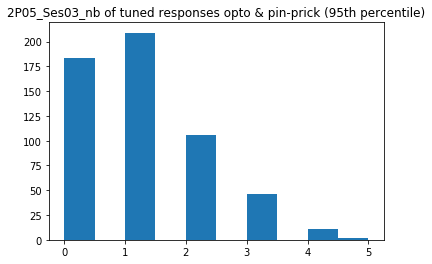

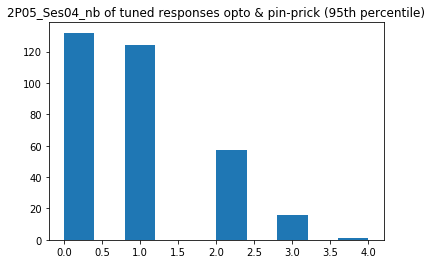

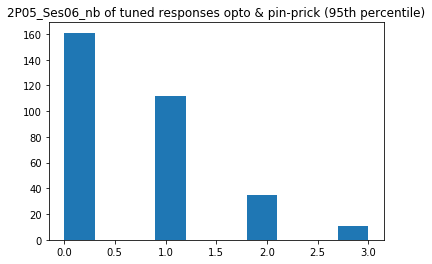

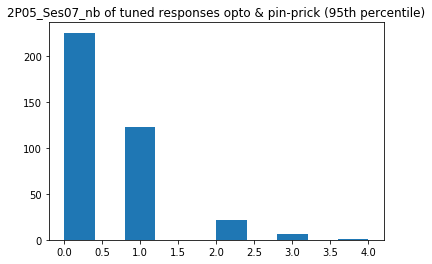

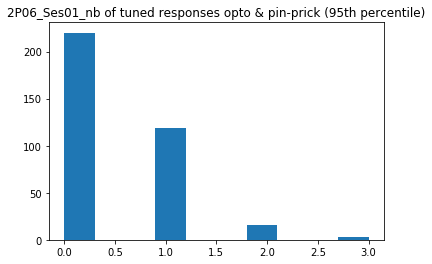

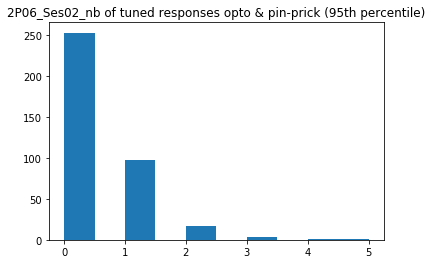

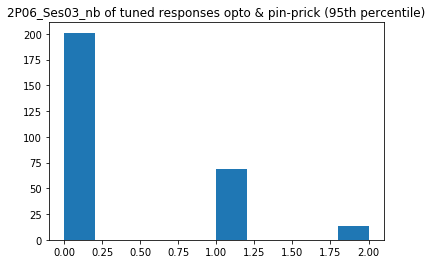

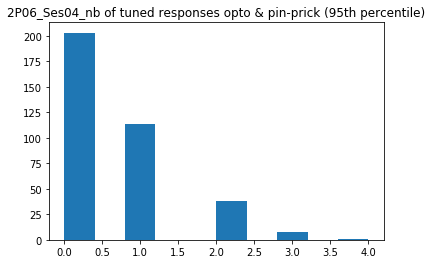

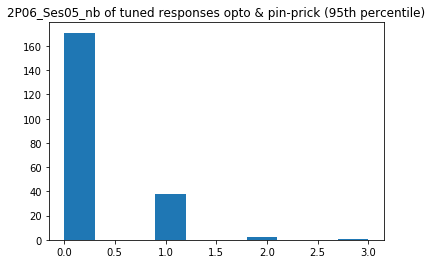

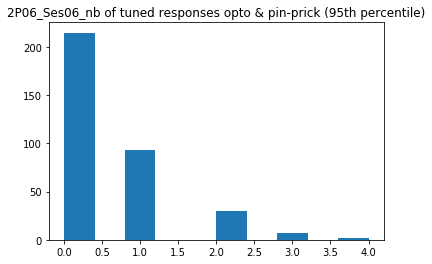

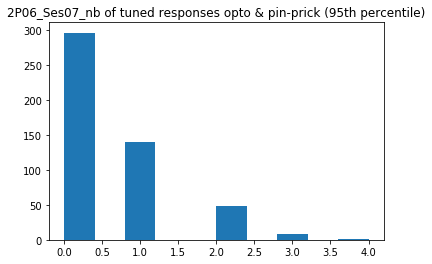

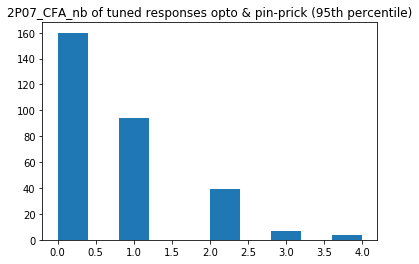

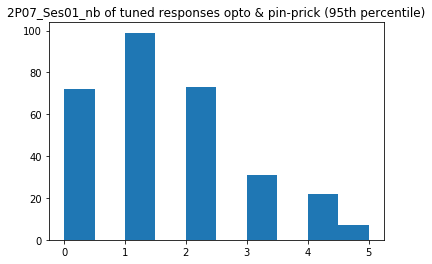

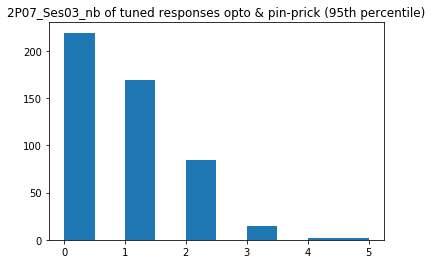

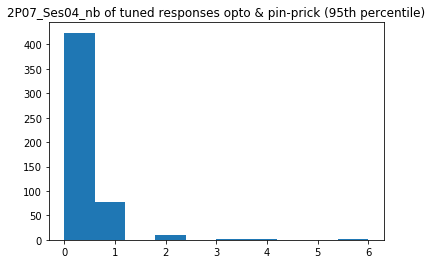

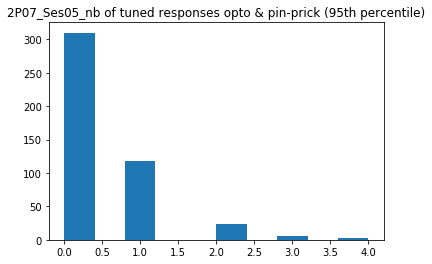

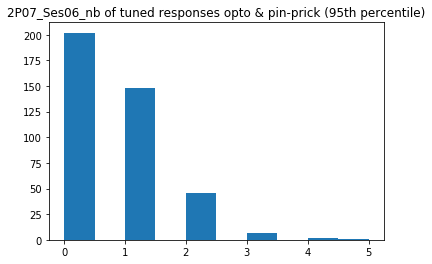

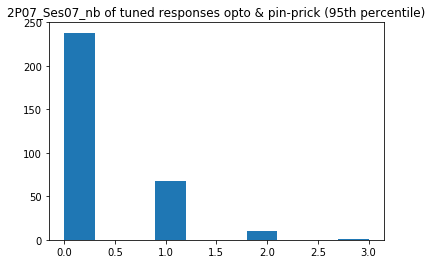

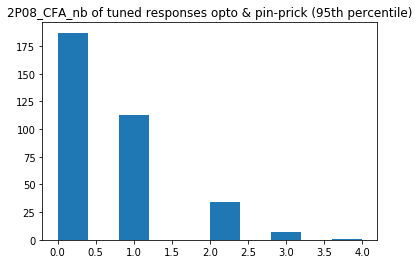

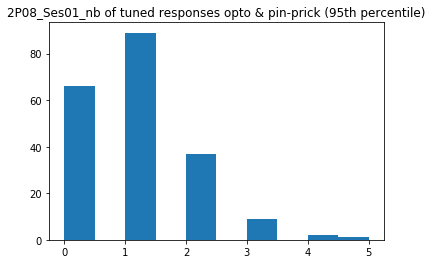

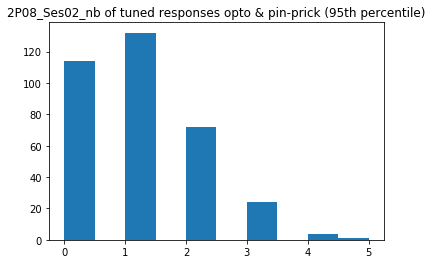

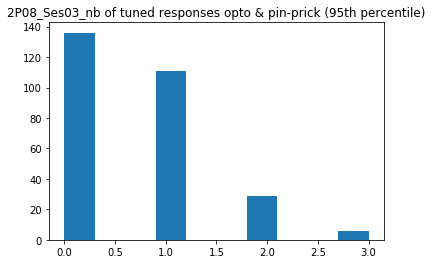

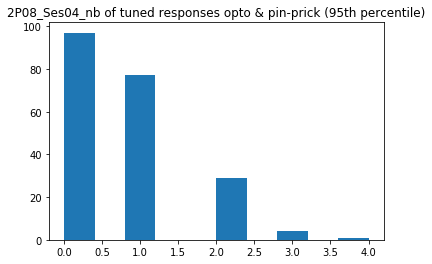

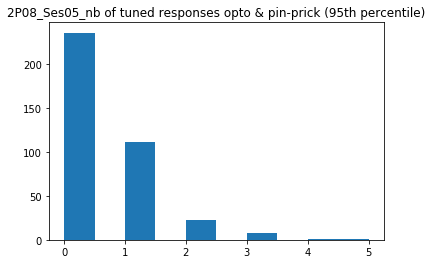

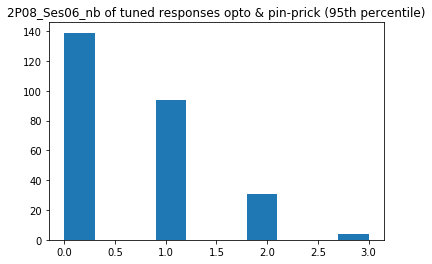

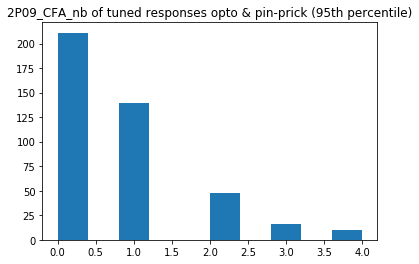

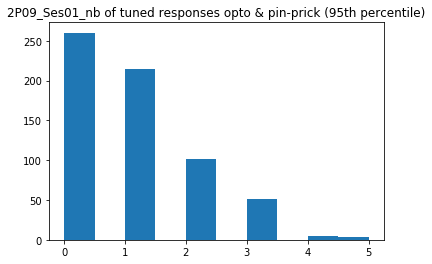

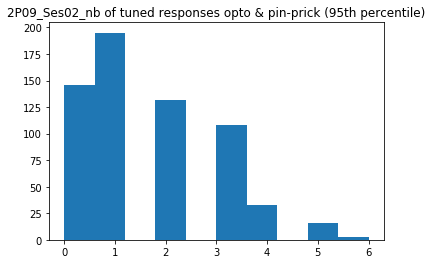

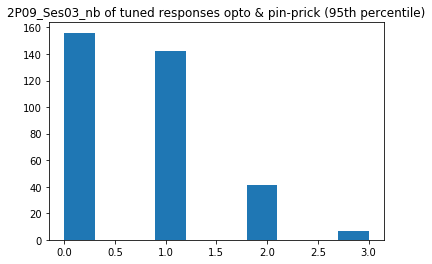

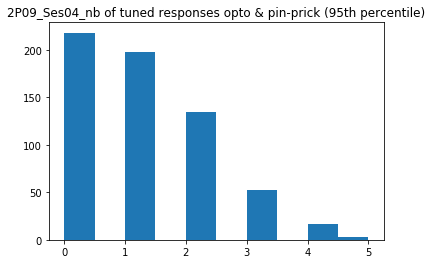

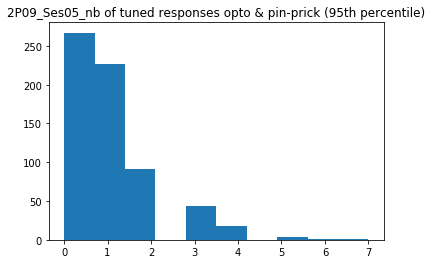

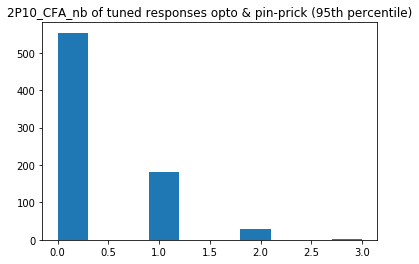

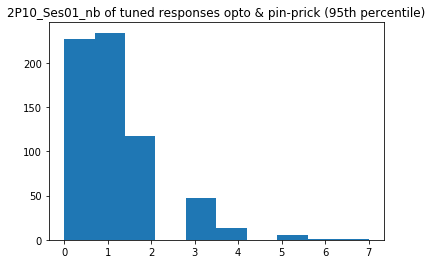

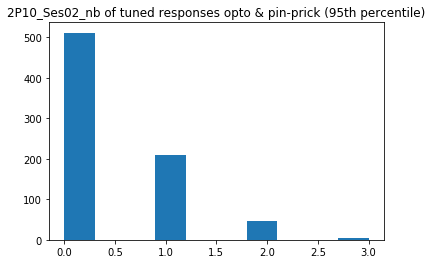

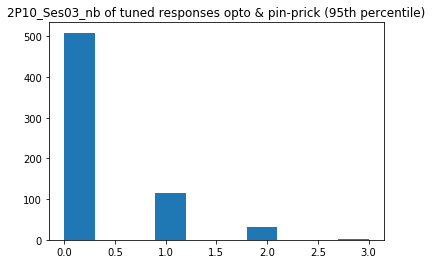

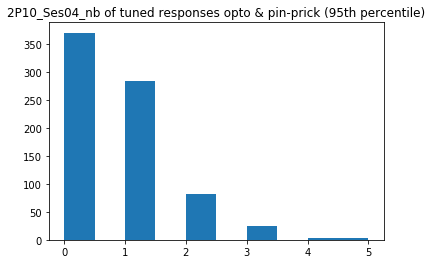

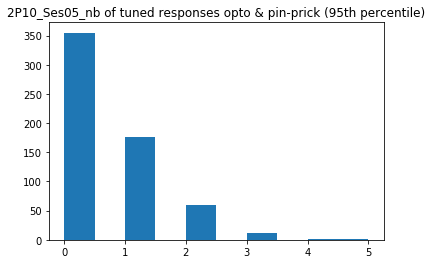

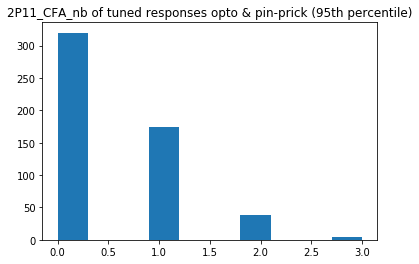

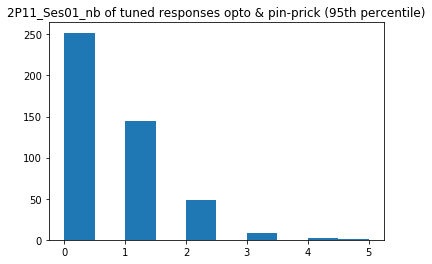

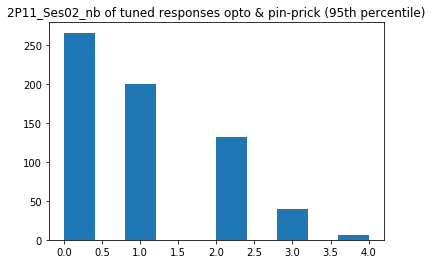

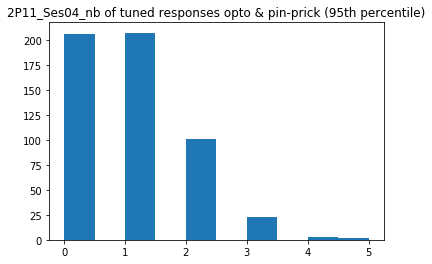

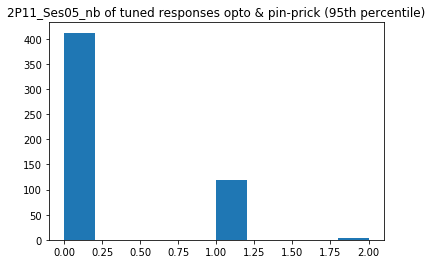

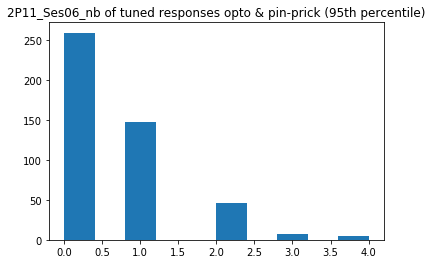

In [28]:
# Compute activity index for each cell
session_names = []
li = []

for session in sessions:
    if session.startswith('._'): # circumventing issues with invisible files on external drives
        continue
    if session.endswith('2P05_Ses01.csv'): # excluding for the time being incomplete sessions (half-sessions)
        continue
    if session.endswith('2P05_Ses02.csv'):
        continue
    if session.endswith('2P07_Ses02.csv'):
        continue
    if session.endswith('2P11_Ses03.csv'):
        continue
    #if session.endswith('CFA.csv'): # excluding for the time being CFA sessions
        #continue
    
    #print('processing: ', session)
    entries = session.split('_')
    
    if session.endswith('CFA.csv'): 
        ses_name = entries[2][2:]+'_'+entries[3][:3]
        
    else:
        ses_name = entries[2][2:]+'_'+entries[3][:5]
            
    #print(ses_name)
    session_names.append(ses_name)
    
    tuning = pd.read_csv(os.path.join(input_path, session))
    tuning.set_index('trial', inplace=True)
    #tuning.loc['sum']= tuning.sum(axis=0)
    #plt.figure()
    #plt.hist(tuning.loc['sum'])
    #plt.title(ses_name+'_nb of tuned responses (95th percentile)')
    #plt.savefig(os.path.join(output_path, ses_name+'_nb_tuned_responses_95.png'))
    
    T = tuning.T
    #targets = T[T.columns[(T.columns.str.contains('warm')) | (T.columns.str.contains('hot'))|(T.columns.str.contains('opto'))
                      #| (T.columns.str.contains('von frey'))| (T.columns.str.contains('pin-prick'))]]
    #targets['tSum'] = targets.sum(axis=1)
    #plt.figure()
    #plt.hist(targets['tSum'])
    #plt.title(ses_name+'_nb of tuned responses to stimulation (95th percentile)')
    #plt.savefig(os.path.join(output_path, ses_name+'_nb_tuned_resp_stimulated_95.png'))
   
    #thermal = T[T.columns[(T.columns.str.contains('warm')) | (T.columns.str.contains('hot'))]]
    #thermal['thSum'] = thermal.sum(axis=1)
    #plt.figure()
    #plt.hist(thermal['thSum'])
    #plt.title(ses_name+'_nb of tuned responses warm & hot (95th percentile)')
    #plt.savefig(os.path.join(output_path, ses_name+'_nb_tuned_resp_thermal_95.png'))
    
    #mechanical = T[T.columns[(T.columns.str.contains('von frey')) | (T.columns.str.contains('pin-prick'))]]
    #mechanical['mSum'] = mechanical.sum(axis=1)
    #plt.figure()
    #plt.hist(mechanical['mSum'])
    #plt.title(ses_name+'_nb of tuned responses von frey & pin-prick (95th percentile)')
    #plt.savefig(os.path.join(output_path, ses_name+'_nb_tuned_resp_mechanical_95.png'))
    
    #noxious = T[T.columns[(T.columns.str.contains('hot')) |(T.columns.str.contains('opto'))| (T.columns.str.contains('pin-prick'))]]
    #noxious['noxSum'] = noxious.sum(axis=1)
    #plt.figure()
    #plt.hist(noxious['noxSum'])
    #plt.title(ses_name+'_nb of tuned responses hot, opto & pin-prick (95th percentile)')
    #plt.savefig(os.path.join(output_path, ses_name+'_nb_tuned_resp_noxious_95.png'))
    
    noxShort = T[T.columns[(T.columns.str.contains('opto'))| (T.columns.str.contains('pin-prick'))]]
    noxShort['nsSum'] = noxShort.sum(axis=1)
    plt.figure()
    plt.hist(noxShort['nsSum'])
    plt.title(ses_name+'_nb of tuned responses opto & pin-prick (95th percentile)')
    plt.savefig(os.path.join(output_path, ses_name+'_nb_tuned_resp_noxShort_95.png'))

In [29]:
from matplotlib_venn import venn3
T.head()

trial,2P11_Ses06_13DEC2021_hot_Trial_1_87974,2P11_Ses06_13DEC2021_hot_Trial_2_96662,2P11_Ses06_13DEC2021_hot_Trial_3_84045,2P11_Ses06_13DEC2021_pin-prick_Trial_1_31158,2P11_Ses06_13DEC2021_pin-prick_Trial_2_84315,2P11_Ses06_13DEC2021_pin-prick_Trial_3_75417,2P11_Ses06_13DEC2021_warm_Trial_1_67893,2P11_Ses06_13DEC2021_warm_Trial_2_59801,2P11_Ses06_13DEC2021_warm_Trial_3_96813,2P11_Ses06_13DEC2021_von frey_Trial_1_91913,...,2P11_Ses06_13DEC2021_approach_Trial_3_10200,2P11_Ses06_13DEC2021_opto_Trial_1_84012,2P11_Ses06_13DEC2021_opto_Trial_2_23609,2P11_Ses06_13DEC2021_opto_Trial_3_54599,2P11_Ses06_13DEC2021_off-target_Trial_1_99266,2P11_Ses06_13DEC2021_off-target_Trial_2_51471,2P11_Ses06_13DEC2021_off-target_Trial_3_40743,2P11_Ses06_13DEC2021_no stim_Trial_1_55312,2P11_Ses06_13DEC2021_no stim_Trial_2_72170,2P11_Ses06_13DEC2021_spontaneous_Trial_3_12311
2P11_Ses06_0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2P11_Ses06_1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2P11_Ses06_2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2P11_Ses06_4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2P11_Ses06_5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


/Users/aspra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/aspra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/aspra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

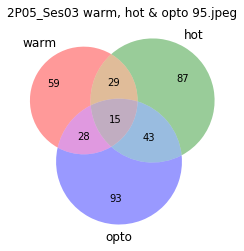

/Users/aspra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/aspra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/aspra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

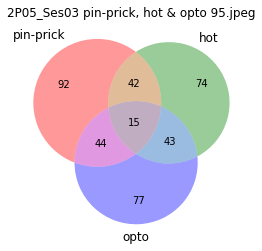

/Users/aspra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/aspra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/aspra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

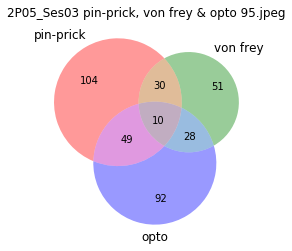

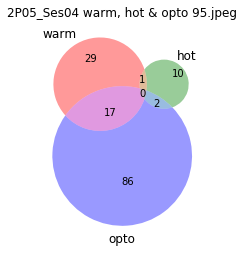

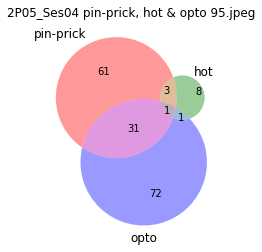

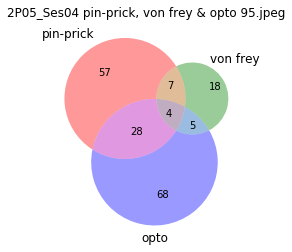

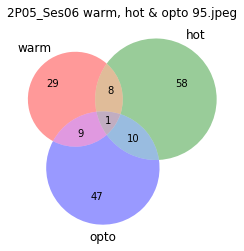

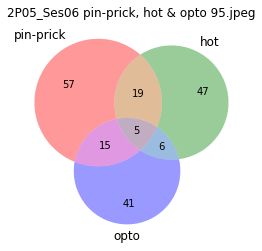

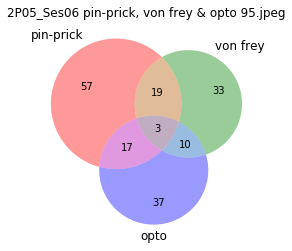

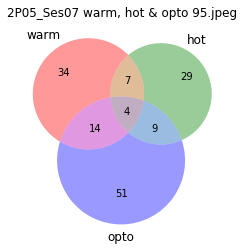

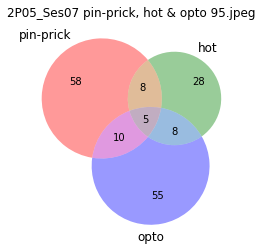

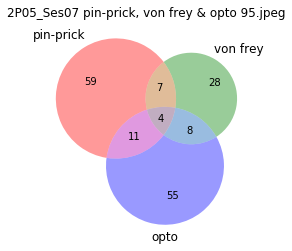

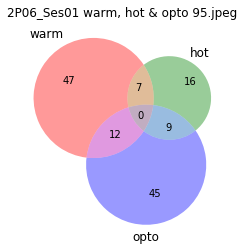

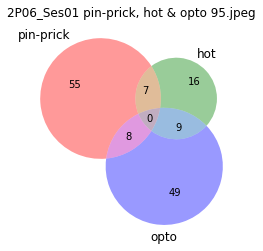

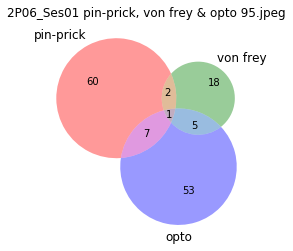

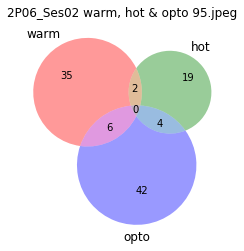

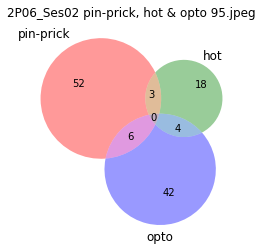

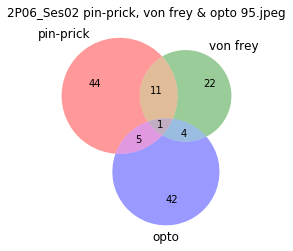

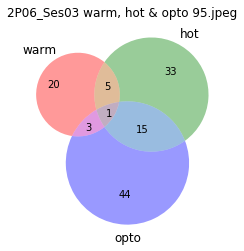

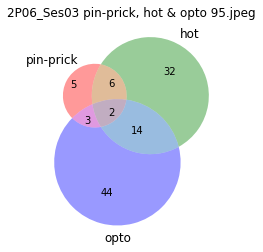

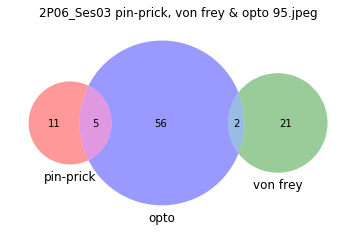

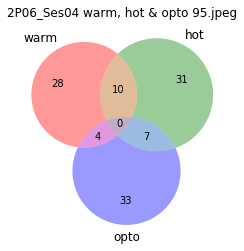

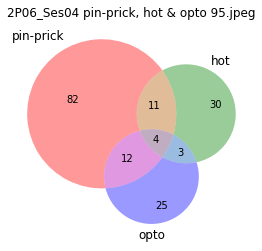

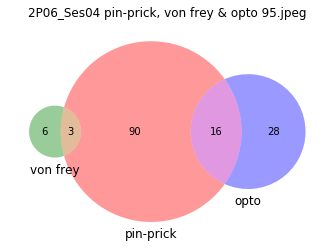

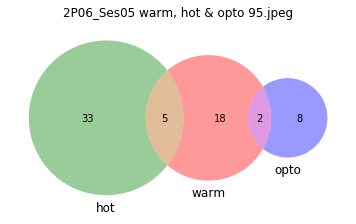

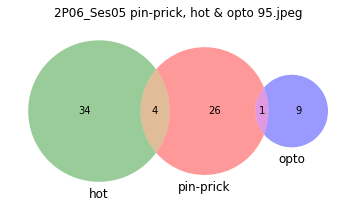

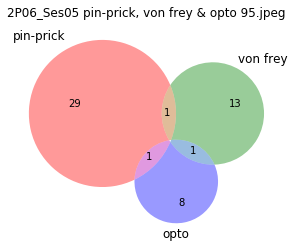

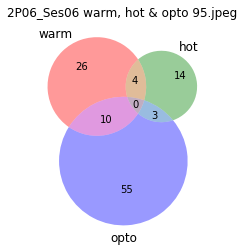

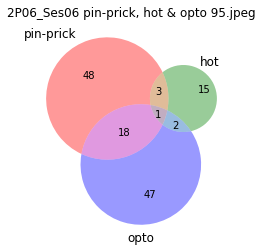

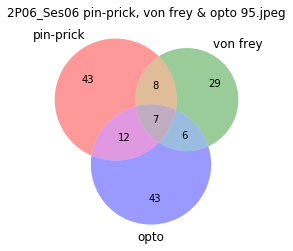

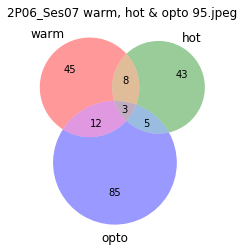

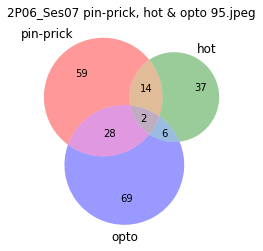

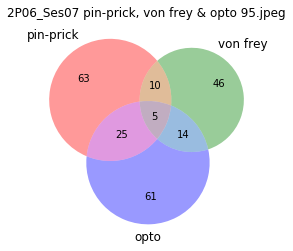

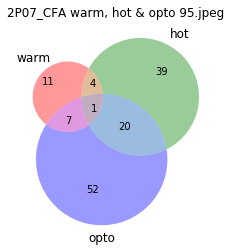

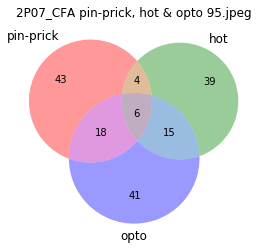

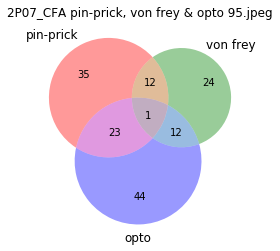

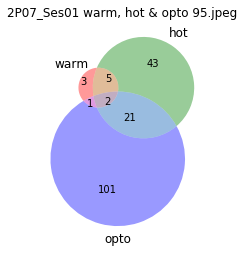

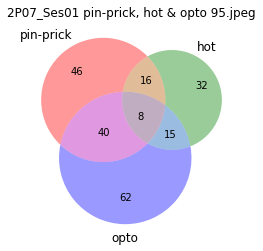

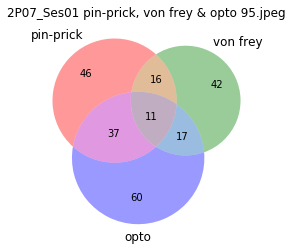

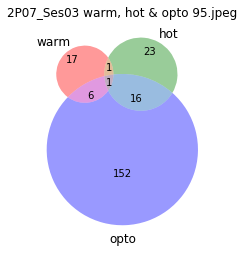

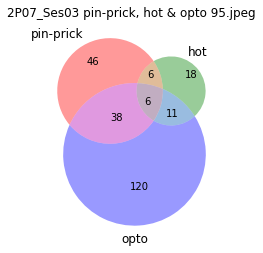

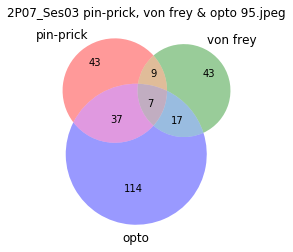

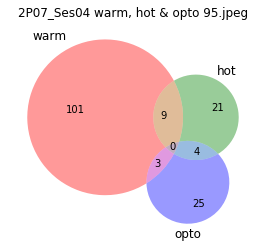

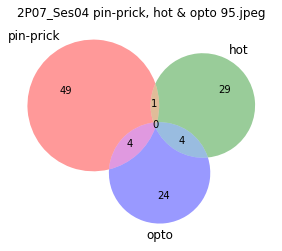

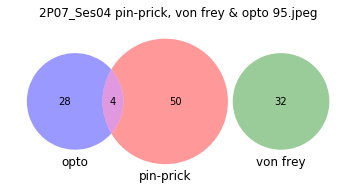

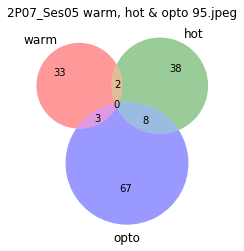

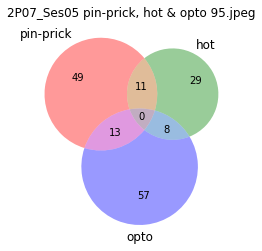

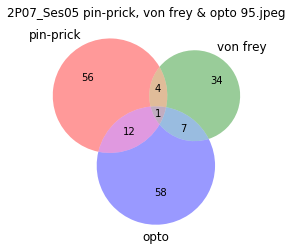

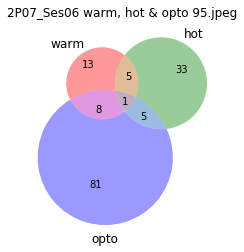

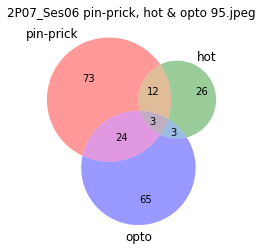

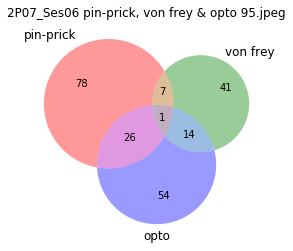

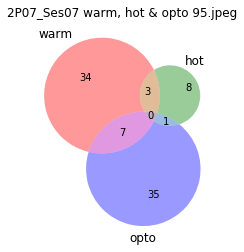

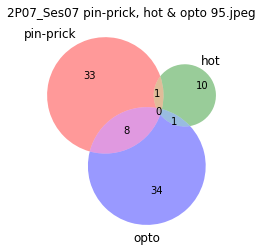

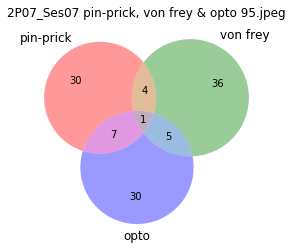

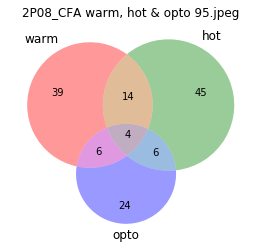

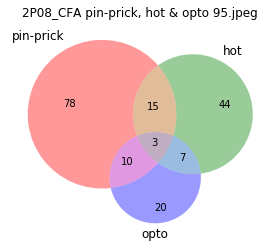

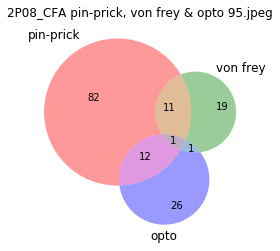

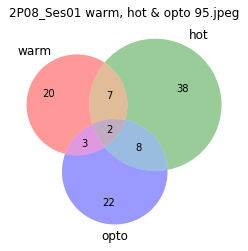

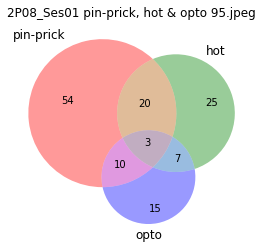

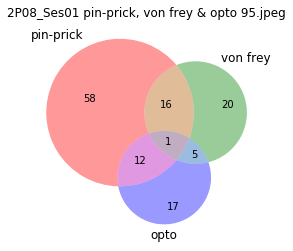

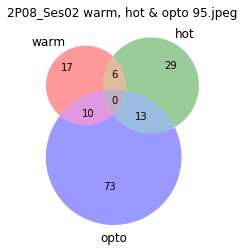

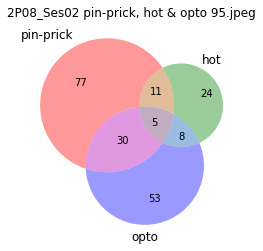

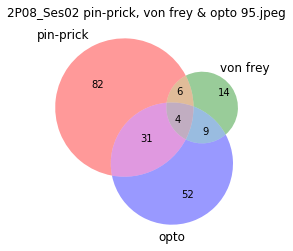

/Users/aspra/anaconda3/lib/python3.7/site-packages/matplotlib_venn/_venn3.py:61: UserWarning: Circle C has zero area
  warnings.warn("Circle C has zero area")


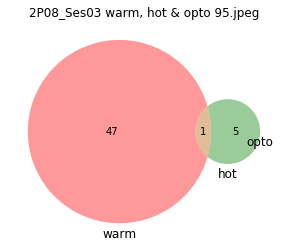

/Users/aspra/anaconda3/lib/python3.7/site-packages/matplotlib_venn/_venn3.py:61: UserWarning: Circle C has zero area
  warnings.warn("Circle C has zero area")


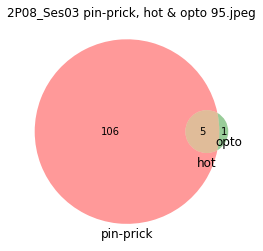

/Users/aspra/anaconda3/lib/python3.7/site-packages/matplotlib_venn/_venn3.py:61: UserWarning: Circle C has zero area
  warnings.warn("Circle C has zero area")


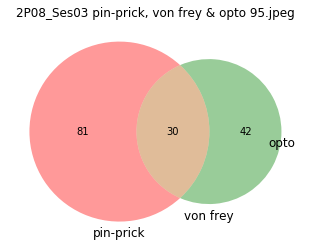

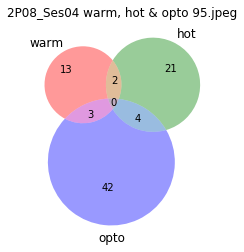

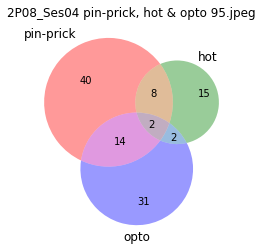

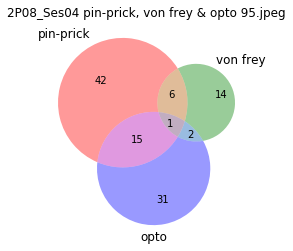

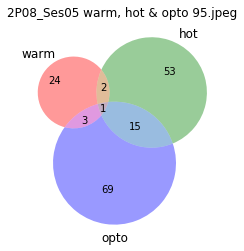

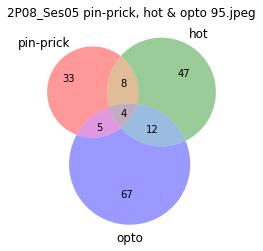

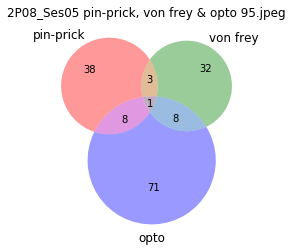

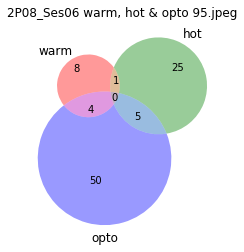

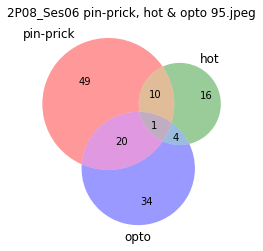

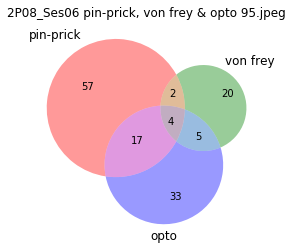

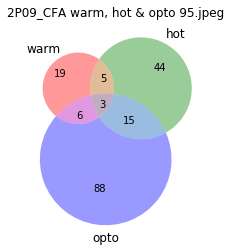

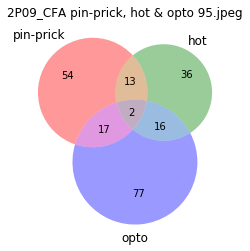

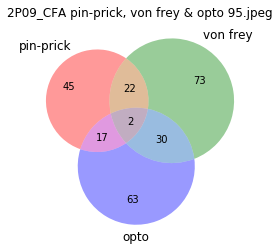

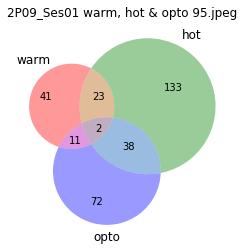

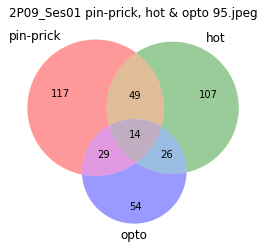

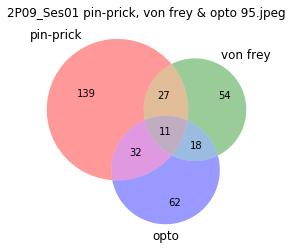

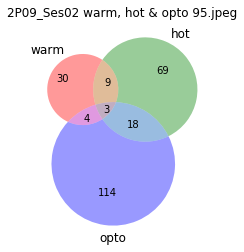

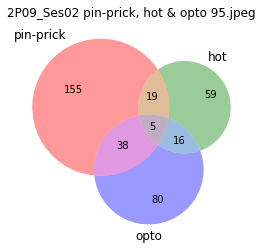

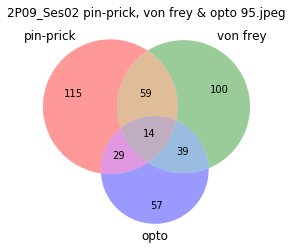

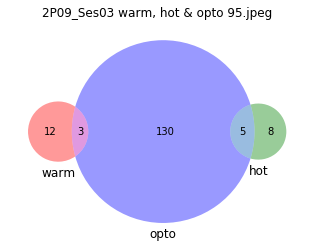

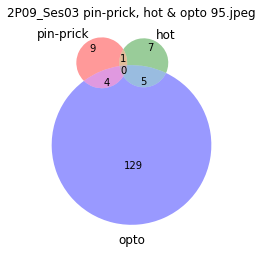

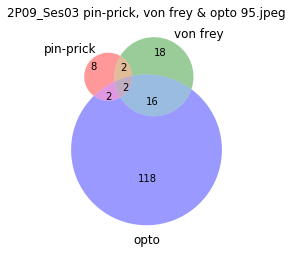

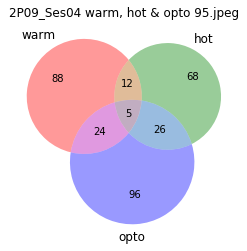

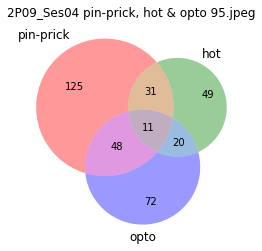

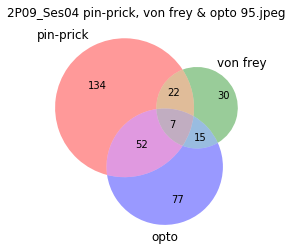

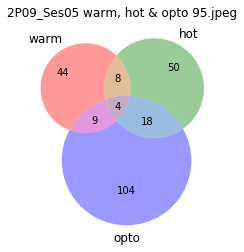

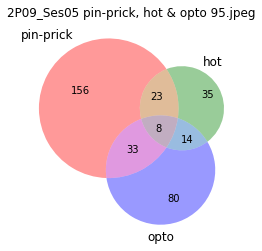

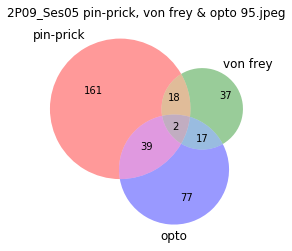

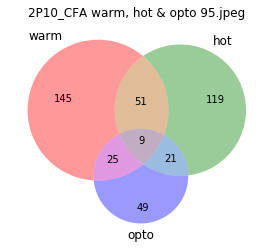

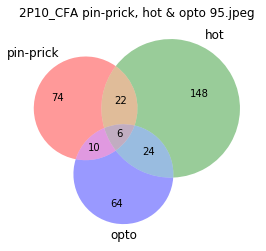

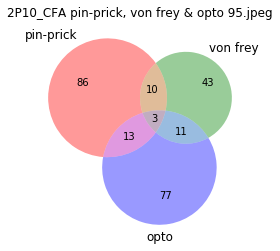

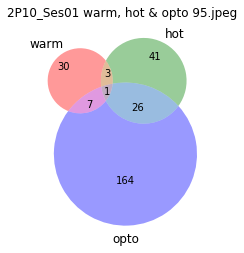

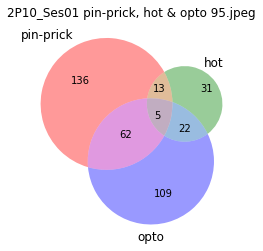

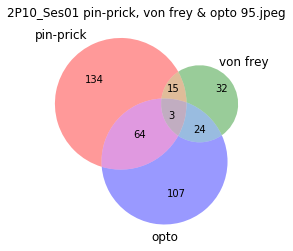

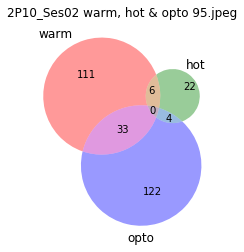

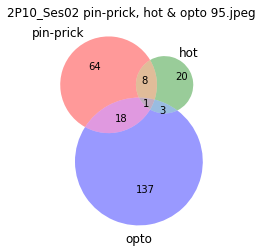

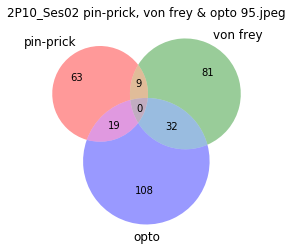

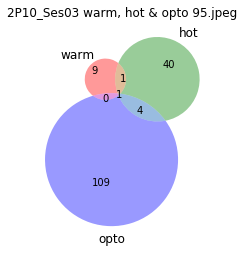

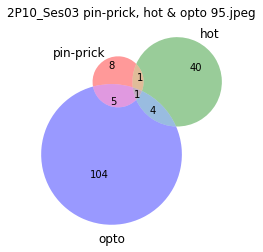

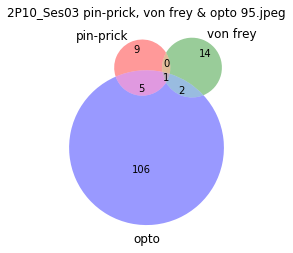

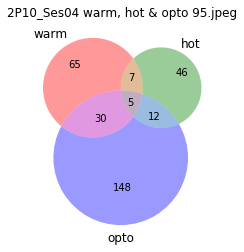

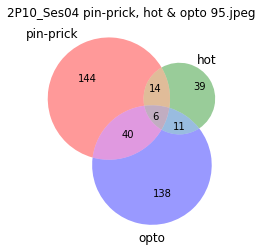

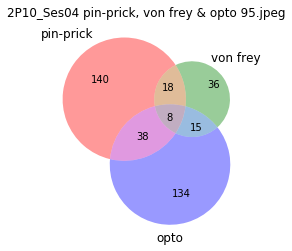

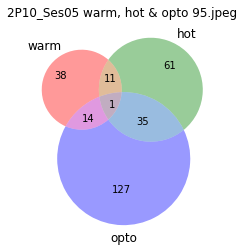

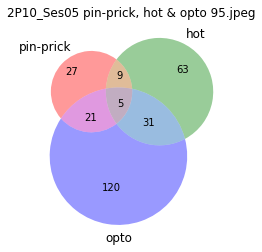

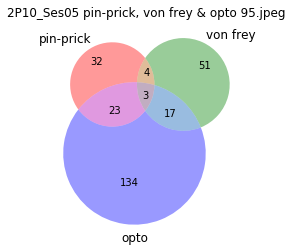

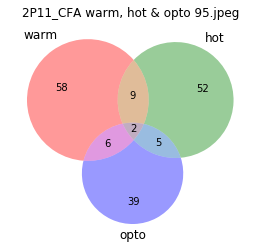

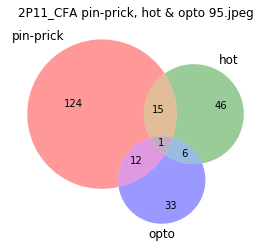

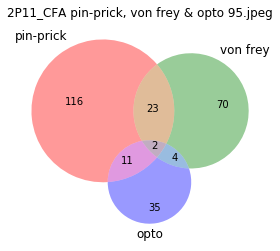

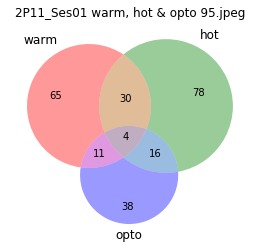

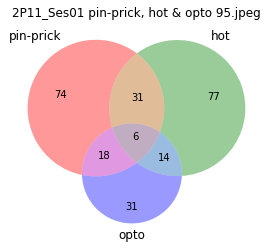

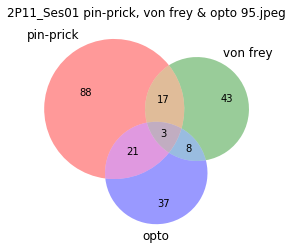

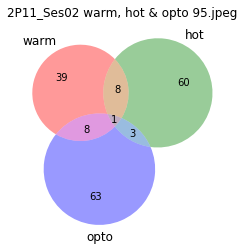

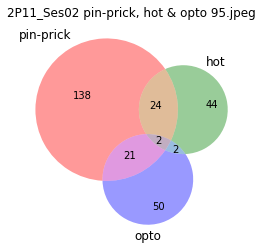

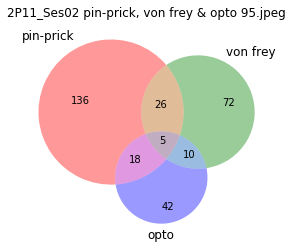

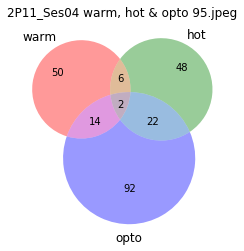

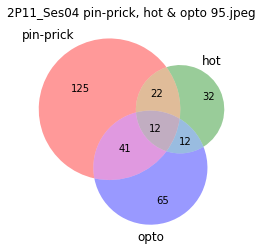

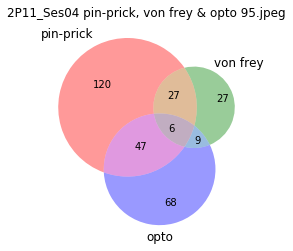

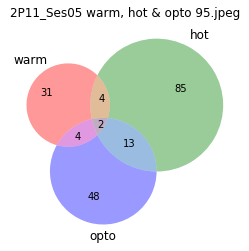

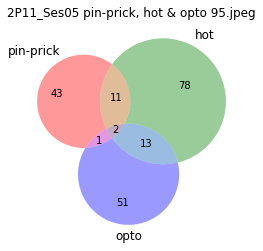

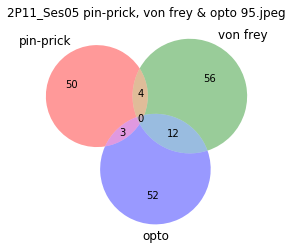

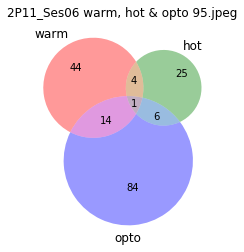

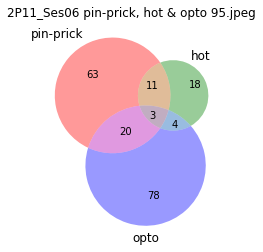

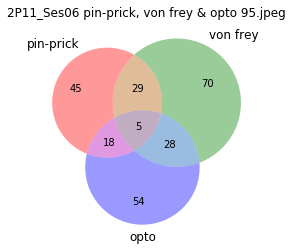

In [36]:
# Visualise modality overlap of tuned cells
session_names = []
li = []

for session in sessions:
    if session.startswith('._'): # circumventing issues with invisible files on external drives
        continue
    if session.endswith('2P05_Ses01.csv'): # excluding for the time being incomplete sessions (half-sessions)
        continue
    if session.endswith('2P05_Ses02.csv'):
        continue
    if session.endswith('2P07_Ses02.csv'):
        continue
    if session.endswith('2P11_Ses03.csv'):
        continue
    
    entries = session.split('_')
    
    if session.endswith('CFA.csv'): 
        ses_name = entries[2][2:]+'_'+entries[3][:3]
        
    else:
        ses_name = entries[2][2:]+'_'+entries[3][:5]
            
    #print(ses_name)
    session_names.append(ses_name)
    
    tuning = pd.read_csv(os.path.join(input_path, session))
    tuning.set_index('trial', inplace=True)
    T = tuning.T
    
    # warm - hot - opto
    warm = T[T.columns[(T.columns.str.contains('warm'))]]
    warm['wSum'] = warm.sum(axis=1)
    warm = warm.reset_index(level=0)
    set1 = set(warm[warm['wSum']==1]['index'])

    hot = T[T.columns[(T.columns.str.contains('hot'))]]
    hot['hSum'] = hot.sum(axis=1)
    hot = hot.reset_index(level=0)
    set2 = set(hot[hot['hSum']==1]['index'])

    opto = T[T.columns[(T.columns.str.contains('opto'))]]
    opto['oSum'] = opto.sum(axis=1)
    opto = opto.reset_index(level=0)
    set3 = set(opto[opto['oSum']==1]['index'])

    venn3([set1, set2, set3], ('warm', 'hot', 'opto'))
    plt.title(ses_name + ' warm, hot & opto 95.jpeg')
    plt.savefig(os.path.join(output_path, ses_name + '_Venn_WarmHotOpto_95.jpeg'))
    plt.show()
    
    # pin-prick- hot - opto
    pp = T[T.columns[(T.columns.str.contains('pin-prick'))]]
    pp['ppSum'] = pp.sum(axis=1)
    pp = pp.reset_index(level=0)
    set1 = set(pp[pp['ppSum']==1]['index'])

    hot = T[T.columns[(T.columns.str.contains('hot'))]]
    hot['hSum'] = hot.sum(axis=1)
    hot = hot.reset_index(level=0)
    set2 = set(hot[hot['hSum']==1]['index'])

    opto = T[T.columns[(T.columns.str.contains('opto'))]]
    opto['oSum'] = opto.sum(axis=1)
    opto = opto.reset_index(level=0)
    set3 = set(opto[opto['oSum']==1]['index'])

    venn3([set1, set2, set3], ('pin-prick', 'hot', 'opto'))
    plt.title(ses_name + ' pin-prick, hot & opto 95.jpeg')
    plt.savefig(os.path.join(output_path, ses_name + '_Venn_Pin-prickHotOpto_95.jpeg'))
    plt.show()
    
    # pin-prick - von frey - opto
    pp = T[T.columns[(T.columns.str.contains('pin-prick'))]]
    pp['ppSum'] = pp.sum(axis=1)
    pp = pp.reset_index(level=0)
    set1 = set(pp[pp['ppSum']==1]['index'])

    vf = T[T.columns[(T.columns.str.contains('von frey'))]]
    vf['vfSum'] = vf.sum(axis=1)
    vf = vf.reset_index(level=0)
    set2 = set(vf[vf['vfSum']==1]['index'])

    opto = T[T.columns[(T.columns.str.contains('opto'))]]
    opto['oSum'] = opto.sum(axis=1)
    opto = opto.reset_index(level=0)
    set3 = set(opto[opto['oSum']==1]['index'])

    venn3([set1, set2, set3], ('pin-prick', 'von frey', 'opto'))
    plt.title(ses_name + ' pin-prick, von frey & opto 95.jpeg')
    plt.savefig(os.path.join(output_path, ses_name + '_Venn_Pin-prickVonFreyOpto_95.jpeg'))
    plt.show()